In [58]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [59]:
df = pd.read_csv("ufo_data_2.csv")
df.shape

(100000, 10)

# PART 1

#### Question: Is there a correlation between UFO shape and the time of day of the sighting?

Morning = 6 am -> 12pm
Afternoon = 12pm -> 6 pm
Evening = 6pm -> 12am
Night = 12 am -> 6 am

In [60]:
def time_of_day(h):
    if h < 6:
        return "Night"
    elif h < 12:
        return "Morning"
    elif h < 18:
        return "Afternoon"
    else:
        return "Evening"

In [61]:
df['Time of Day'] = df['Hour'].apply(time_of_day)

In [62]:
table = df.groupby("Time of Day")["Shape of UFO"].count()
table = table.sort_values()
table

Time of Day
Morning       8814
Afternoon    11261
Night        18584
Evening      61341
Name: Shape of UFO, dtype: int64

As we can see from our table that there are waayyyyy more UFO sightings in the evening (which is what I initially predicted). Let's make a plot of our table...

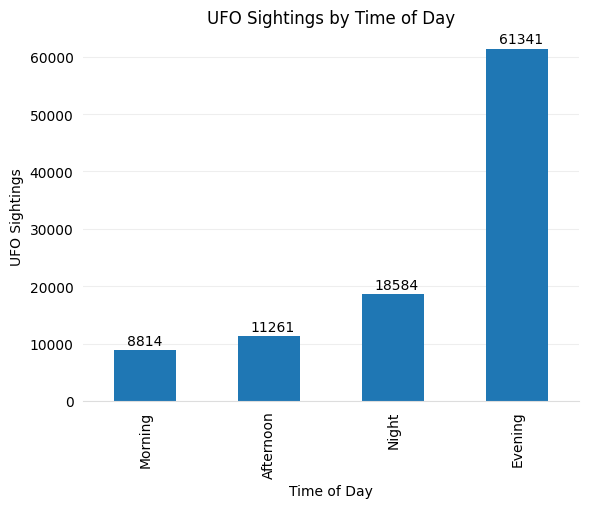

In [63]:
fig, ax = plt.subplots()
table.plot(kind = "bar")
plt.xlabel("Time of Day")
plt.ylabel('UFO Sightings')
plt.title('UFO Sightings by Time of Day')

# Add labels above each bar
for i, v in enumerate(table):
    ax.text(i - 0.15, v + 1000, str(v), color='black')
    
# adding horizontal lines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#DDDDDD')
ax.tick_params(bottom=False, left=False)
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#EEEEEE')
ax.xaxis.grid(False)
plt.show()

Now to get into the question of interest, based on the time of day, we will see the most common UFO sighting shapes and the time of day!

In [64]:
table2 = df.groupby(["Shape of UFO", "Time of Day"])["Time of Day"].size().unstack()
table2 = table2[table2.sum(axis=1) >= 2500]
table2

Time of Day,Afternoon,Evening,Morning,Night
Shape of UFO,,,,
Changing,450.0,1557.0,292.0,607.0
Circle,1151.0,6469.0,999.0,1892.0
Disk,994.0,2157.0,525.0,881.0
Fireball,398.0,5678.0,455.0,1069.0
Formation,290.0,2499.0,252.0,615.0
Light,1101.0,14076.0,1407.0,3938.0
Orb,410.0,3040.0,339.0,784.0
Other,1088.0,3707.0,704.0,1319.0
Oval,748.0,2328.0,509.0,768.0


Text(0.5, 1.0, 'UFO sightings Frequency')

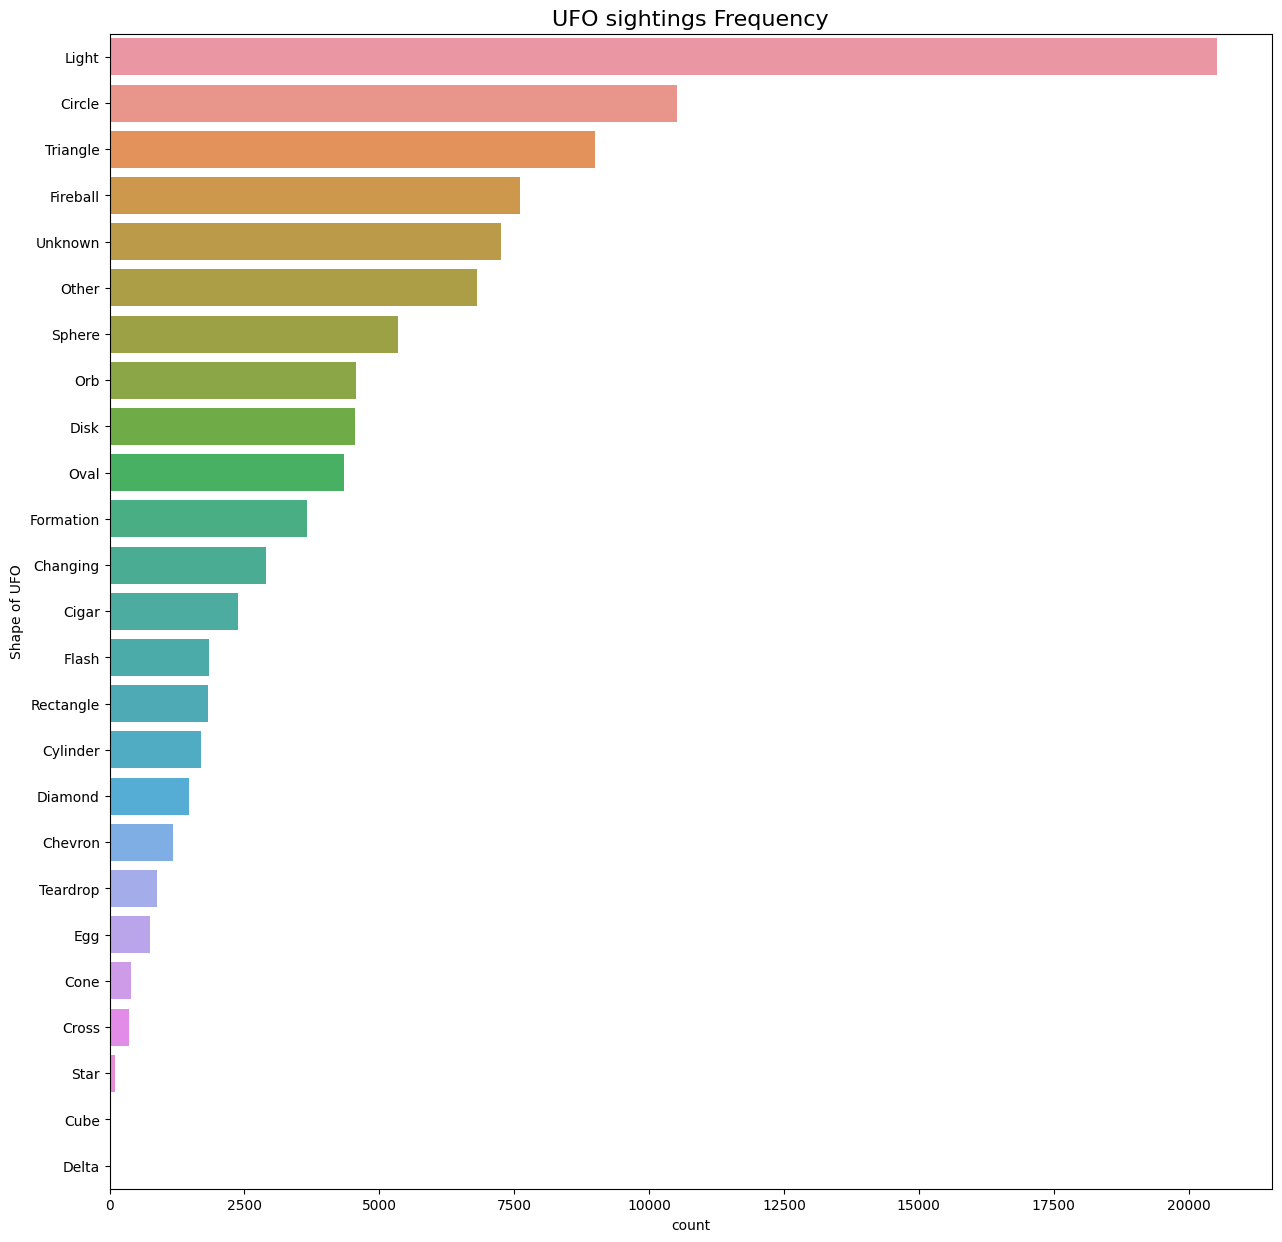

In [65]:
import seaborn as sns

plt.figure(figsize=(15, 15))
sns.countplot(
    data=df,
    y='Shape of UFO',
    order=df['Shape of UFO'].value_counts().index
)

plt.title(
    'UFO sightings Frequency',
    fontdict={
        'fontsize': 16
    }
)

Text(0.5, 1.0, 'UFO sightings Frequency')

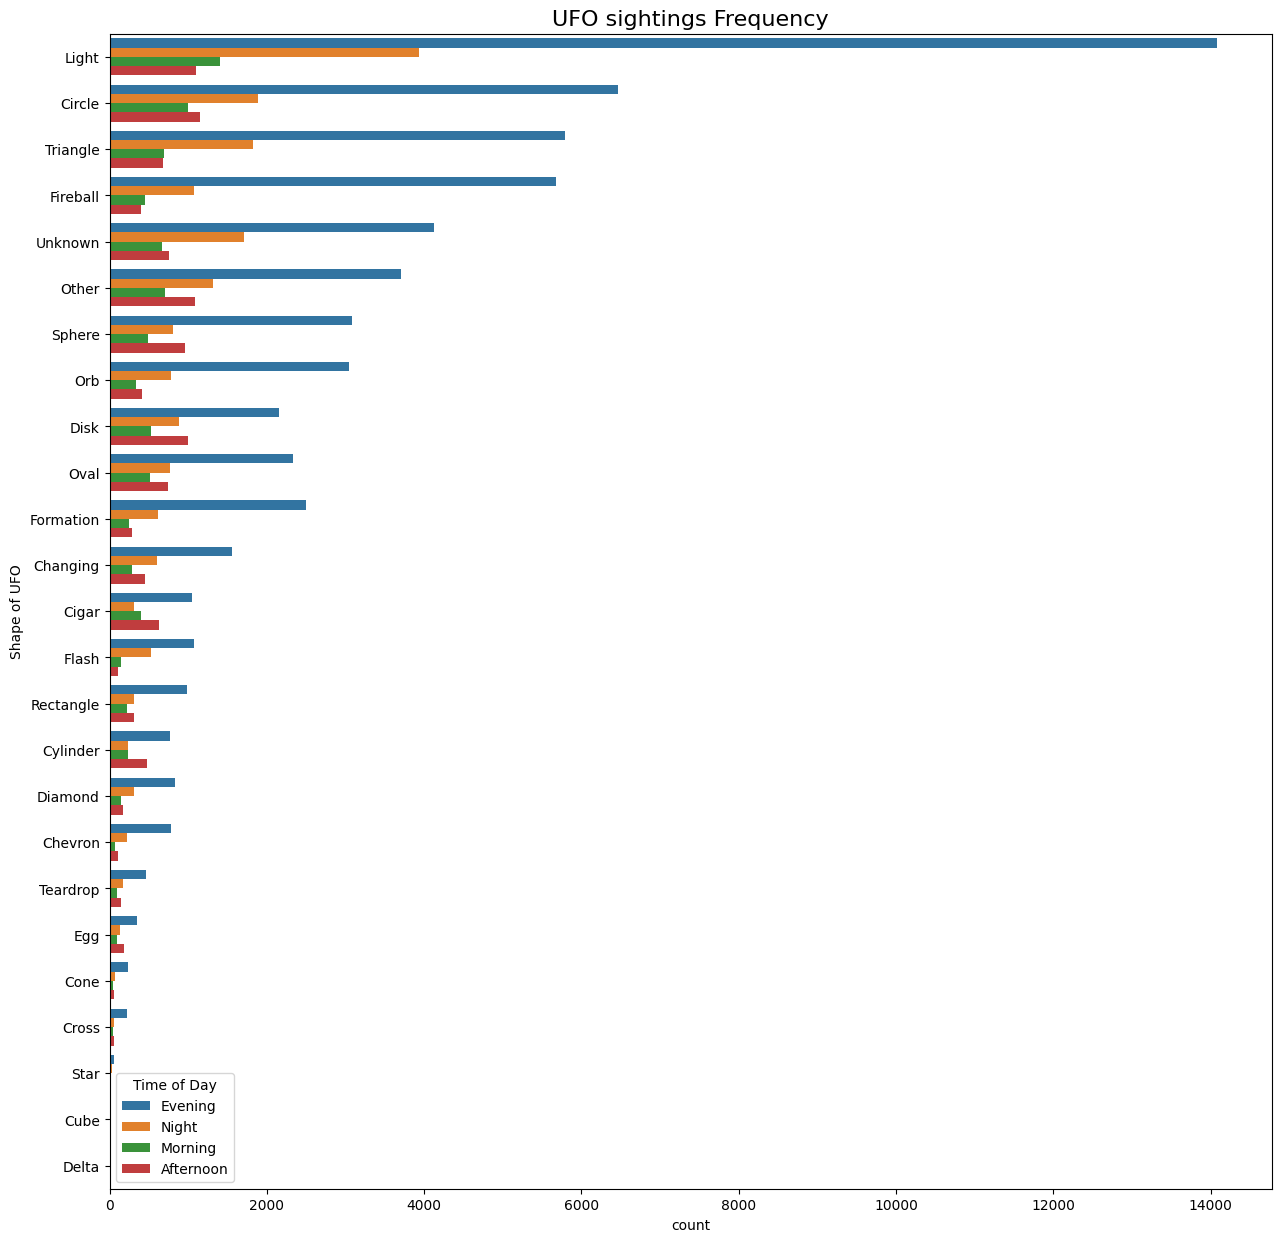

In [66]:
import seaborn as sns

plt.figure(figsize=(15, 15))
sns.countplot(
    data=df,
    y='Shape of UFO',
    hue="Time of Day",
    order=df['Shape of UFO'].value_counts().index
)

plt.title(
    'UFO sightings Frequency',
    fontdict={
        'fontsize': 16
    }
)

This is a pretty cool chart. We can see still that more sightings are in the evening and the more common UFO shapes are reported as a light, a triangle figure, or a circle. But we can also see that it will be very hard to tell if we have an evening sighting, to predict the shape of the UFO. Thus, there is no correlation between the time of day and the shape of a UFO

# PART 2

#### Question: Does there exists any sort of relationship between time and UFO sightings?

In [68]:
table3 = df.groupby(["Time of Day", "Season"])["Time of Day"].size().unstack()
table3

Season,fall,spring,summer,winter
Time of Day,,,,
Afternoon,3353,2176,2644,3088
Evening,17441,13337,18615,11948
Morning,2769,1895,1965,2185
Night,4869,3810,5983,3922


Fall count   = 35330                    
Spring count = 26342                
Summer count = 40667                
Winte count  = 25545

This result/table tells us that the season doesn't really give us info. It seems that this data is very hard to find patterns with UFO sightings except that more sightings are at night. A big reason for this is because our data comes from a huge list of random sightings from a bunch of differ people. 

In [69]:
table4 = df.groupby(["Year", "Shape of UFO"])["Shape of UFO"].size().unstack()
table4 = table4.loc[:, (table4 > 600).any(axis=0)]
table4['Total'] = table4.sum(axis=1)
table4

Shape of UFO,Circle,Fireball,Light,Triangle,Total
Year,,,,,
2003.0,133.0,83.0,329.0,176.0,721.0
2004.0,314.0,204.0,928.0,460.0,1906.0
2005.0,312.0,217.0,864.0,434.0,1827.0
2006.0,317.0,213.0,711.0,370.0,1611.0
2007.0,402.0,216.0,908.0,458.0,1984.0
2008.0,371.0,255.0,985.0,502.0,2113.0
2009.0,401.0,224.0,1045.0,425.0,2095.0
2010.0,398.0,356.0,929.0,434.0,2117.0
2011.0,507.0,555.0,1084.0,532.0,2678.0


I used a little bit of help from stack overflow from using the ggplot library and pip installing it onto my machine.

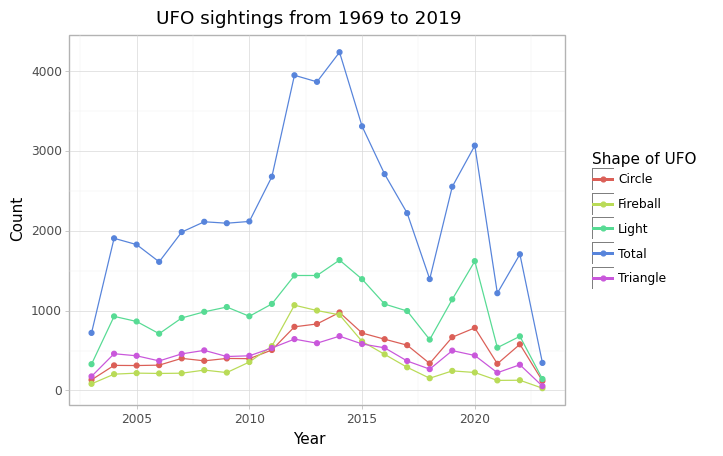

<ggplot: (158618953837)>

In [100]:
from plotnine import *

# create a sample data frame
data = {
    'Year': [2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023],
    'Circle': [133, 314, 312, 317, 402, 371, 401, 398, 507, 797, 833, 977, 719, 642, 567, 338, 667, 784, 334, 578, 120],
    'Fireball': [83, 204, 217, 213, 216, 255, 224, 356, 555, 1068, 1001, 947, 614, 452, 290, 153, 245, 225, 126, 128, 28],
    'Light': [329, 928, 864, 711, 908, 985, 1045, 929, 1084, 1440, 1440, 1633, 1394, 1082, 995, 637, 1141, 1620, 536, 678, 143],
    'Triangle': [176, 460, 434, 370, 458, 502, 425, 434, 532, 643, 592, 680, 582, 534, 369, 267, 499, 438, 222, 322, 54],
    'Total': [721, 1906, 1827, 1611, 1984, 2113, 2095, 2117, 2678, 3948, 3866, 4237, 3309, 2710, 2221, 1395, 2552, 3067, 1218, 1706, 345]
}
table4 = pd.DataFrame(data).set_index('Year')

# reshape the data frame from wide to long format
table4_long = pd.melt(table4.reset_index(), id_vars=['Year'], var_name='Shape of UFO', value_name='Count')

# plot the reshaped data frame using plotnine
(
    ggplot(table4_long, aes(x='Year', y='Count', color='Shape of UFO')) + 
    geom_line() + 
    geom_point() + 
    theme_light() +
    ggtitle('UFO sightings from 1969 to 2019') 
)

<AxesSubplot: xlabel='Year'>

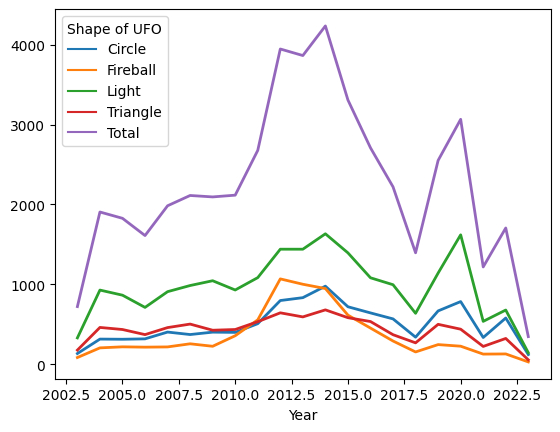

In [70]:
import seaborn as sns

sns.lineplot(table4, dashes=False, linewidth=2)

From what I see, it is hard to see whether time (year or season of sighting) plays a role in UFO sightings in general.

I asked chatGPT why people "saw" so many UFO sightings around 2012 and this is what it said...          
"In 2011, the National Press Club in Washington, D.C. held a conference on UFOs and extraterrestrial life. In the same year, a group of retired military officials also held a press conference about their experiences with UFO sightings during their time in service. Additionally, in 2012, a number of sightings were reported over several nights in the skies above the U.S. city of Phoenix, which garnered national attention."